In [ ]:
from numpy import array
from numpy import argmax
from tensorflow.keras.utils import to_categorical

In [ ]:
from numpy import array
from numpy import argmax
from tensorflow.keras.utils import to_categorical

In [ ]:
data = [9,5,6,0,3,4,2,1,0,7,8,9,6]
data = array(data)
print(data)

[9 5 6 0 3 4 2 1 0 7 8 9 6]


In [ ]:
# one hot encode
encoded = to_categorical(data)
print(encoded)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
# importing required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.image as mpimg
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

In [ ]:
# loading the required train and test MNIST dataset
(train_data_x, train_data_y), (test_data_x, test_data_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_data_x.shape[0], train_data_x.shape[1], train_data_x.shape[2])

60000 28 28


In [ ]:
print(test_data_x.shape[0], test_data_x.shape[1], test_data_x.shape[2])

10000 28 28


In [ ]:
# flattenning each of (28*28) images to a 784 vector of pixels using reshape() 
pixel_num = train_data_x.shape[1] * train_data_x.shape[2]
train_data_x = train_data_x.reshape((train_data_x.shape[0], pixel_num)).astype('float32')
test_data_x = test_data_x.reshape((test_data_x.shape[0], pixel_num)).astype('float32')

In [ ]:
# normalizing inputs from (0-255) to (0-1) by dividing each value by 255 which is the maximum pixel value on a grayscale
train_data_x = train_data_x / 255
test_data_x = test_data_x / 255

In [ ]:
# one hot encoding of outputs
# transforming vector of class integers into a binary matrix
train_data_y = np_utils.to_categorical(train_data_y)
test_data_y = np_utils.to_categorical(test_data_y)
class_num = test_data_y.shape[1]

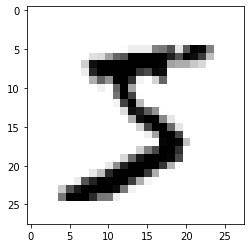

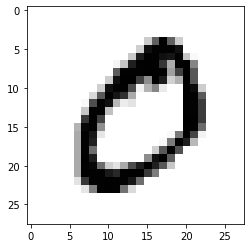

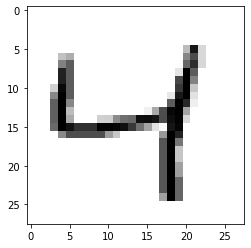

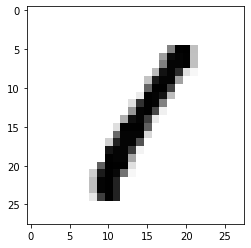

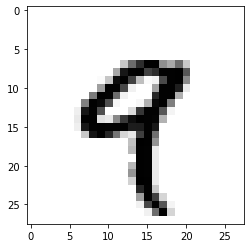

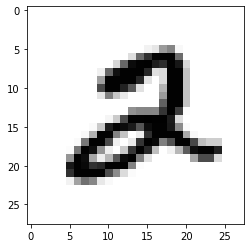

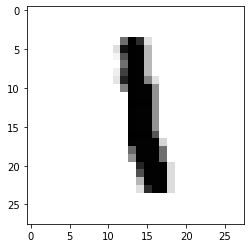

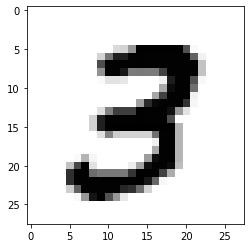

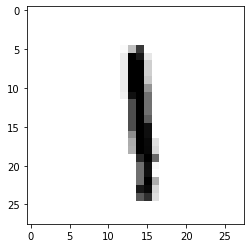

In [ ]:
# Plotting first 10 dataset images
for i in range(9):
 plt.imshow(train_data_x[i].reshape(28, 28), cmap = plt.cm.binary)
 #show the plot
 plt.show()

In [ ]:
# defining the baseline model
def baseline_model():
	# creating the model
	model = Sequential()
	model.add(Dense(pixel_num, input_dim=pixel_num, activation='relu'))
	model.add(Dense(class_num, activation='softmax'))
	# Compiling the model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
# building the model
model = baseline_model()

In [ ]:
# Fitting the model over 10 epochs  
model.fit(train_data_x, train_data_y, validation_data=(test_data_x, test_data_y), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 5s - loss: 4.8967 - accuracy: 0.9104 - val_loss: 1.2246 - val_accuracy: 0.9441 - 5s/epoch - 16ms/step
Epoch 2/10
300/300 - 4s - loss: 0.6440 - accuracy: 0.9604 - val_loss: 0.8156 - val_accuracy: 0.9543 - 4s/epoch - 14ms/step
Epoch 3/10
300/300 - 4s - loss: 0.3146 - accuracy: 0.9730 - val_loss: 0.4879 - val_accuracy: 0.9639 - 4s/epoch - 14ms/step
Epoch 4/10
300/300 - 4s - loss: 0.2022 - accuracy: 0.9788 - val_loss: 0.5619 - val_accuracy: 0.9628 - 4s/epoch - 14ms/step
Epoch 5/10
300/300 - 4s - loss: 0.1440 - accuracy: 0.9832 - val_loss: 0.5519 - val_accuracy: 0.9633 - 4s/epoch - 13ms/step
Epoch 6/10
300/300 - 4s - loss: 0.1524 - accuracy: 0.9828 - val_loss: 0.5999 - val_accuracy: 0.9610 - 4s/epoch - 14ms/step
Epoch 7/10
300/300 - 4s - loss: 0.1468 - accuracy: 0.9829 - val_loss: 0.5021 - val_accuracy: 0.9650 - 4s/epoch - 14ms/step
Epoch 8/10
300/300 - 4s - loss: 0.1618 - accuracy: 0.9827 - val_loss: 0.5601 - val_accuracy: 0.9637 - 4s/epoch - 14ms/step
Epoch 9/10
300/3

In [ ]:
# Final evaluation of the model
scores = model.evaluate(test_data_x, test_data_y, verbose=0)
print("Prediction Accuracy: " + str(scores[1]))
print("Baseline Error: %.2f%%" % (100-(scores[1]*100)))

Prediction Accuracy: 0.9668999910354614
Baseline Error: 3.31%
